Perguntas de pesquisa que irão guiar essa investigação

Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre os níveis e formação ?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre pessoas mais e menos experientes ?
Será que existem diferenças enrtre os níveis de adaptação, satisfação e burnout entre pessoas mais velhas e mais novas?
Será que existem diferenças entre os níveis de adaptação, satisfação e burnout e as funções realizadas nos projetos?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
from scipy.stats import ttest_ind
#import matplotlib.pyplot as plt
import seaborn as sns
#dados = pd.read_excel('/home/danilo/Documentos/GitHub/PesquisaIdade/data/idade.xlsx')
dados = pd.read_excel(r'C:\Users\danilo.ribeiro\Documents\GitHub\PesquisaDoutoradoPosDiferencas\data\idade.xlsx')
dados.head()
dados.columns


Index(['sexo', 'idade', 'formacao', 'curso', 'anoFormacao',
       'tempoProfissional', 'tempoFuncao', 'funcao', 'metodologia',
       'existenciaProjeto', 'mesesNoProjeto',
       '@12.Emrelaçãoassuascaracterísticasporfavorresponda', 'S1', 'S2', 'S3',
       'C2', 'C3', 'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4',
       'T2', 'I2', 'I1', 'I4', 'I3',
       '@13.Pararesponderasquestõesabaixoconsidereseuprojetoatua', 'equipe1',
       'reque1', 'reque2', 'reque3', 'tec1', 'req4', 'tec2', 'tec3', 'tec4',
       'req5', 'equipe2', 'equipe3', 'req6', 'tec5', 'tec6', 'req7', 'equipe4',
       '@14.Emrelaçãoaoseudiaadiadotrabalho', 'ci2', 'et6', 'ci3', 'satXet6',
       'ee6', 'ee2', 'et5', 'ci1', 'et4', 'ee1', 'et1', 'et2', 'et3', 'ee3',
       'ci4', 'ee5', '@15.Emrelaçãoasuasatisfaçãocomotrabalho', 'sat1',
       'sat2'],
      dtype='object')

In [2]:

dados['Gerenciamento_Stress'] = (dados['S1']+dados['S2']+dados['S3'])
dados['Resolucao_Problemas'] = (dados['C1']+dados['C2']+dados['C3']+dados['C4'])
dados['Gerenciamento_Emergencia'] = (dados['EM1']+dados['EM2']+dados['EM3'])
dados['Aprendizado'] = (dados['T1']+dados['T2']+dados['T3']+dados['T4'])
dados['Interpersoal'] = (dados['I1']+dados['I2']+dados['I3']+dados['I4'])
dados['satisfacao']= (dados['sat1']+dados['sat2']+dados['satXet6'])
dados['Burnout_cinismo'] = (dados['ci1']+dados['ci2']+dados['ci3']+dados['ci4'])
dados['Burnout_exaustao'] = (dados['ee1']+dados['ee2']+dados['ee3']+dados['ee5']+dados['ee6'])
dados['Burnout_eficacia'] = (dados['et1']+dados['et2']+dados['et3']+dados['et4']+dados['et5']+dados['satXet6'])
dados['instabilidade_equipe'] = (dados['equipe1']+dados['equipe2']+dados['equipe3']+dados['equipe4'])
dados['instabilidade_tecnica'] = (dados['tec1']+dados['tec2']+dados['tec3']+dados['tec4'])
dados['instabilidade_tarefa'] = (dados['reque1']+dados['reque2']+dados['reque3']+dados['req4']+dados['req5']+dados['req6']+dados['req7'])

dados.columns

labels = ['@12.Emrelaçãoassuascaracterísticasporfavorresponda', 'S1', 'S2', 'S3',
          'C2', 'C3', 'C4', 'C1', 'EM4', 'EM1', 'EM3', 'EM2', 'T3', 'T1', 'T4',
          'T2', 'I2', 'I1', 'I4', 'I3',
          '@13.Pararesponderasquestõesabaixoconsidereseuprojetoatua', 'equipe1',
          'reque1', 'reque2', 'reque3', 'tec1', 'req4', 'tec2', 'tec3', 'tec4',
          'req5', 'equipe2', 'equipe3', 'req6', 'tec5', 'tec6', 'req7', 'equipe4',
          '@14.Emrelaçãoaoseudiaadiadotrabalho', 'ci2', 'et6', 'ci3', 'satXet6',
          'ee6', 'ee2', 'et5', 'ci1', 'et4', 'ee1', 'et1', 'et2', 'et3', 'ee3',
          'ci4', 'ee5', '@15.Emrelaçãoasuasatisfaçãocomotrabalho', 'sat1', 'sat2']
dados.drop(columns = labels, inplace=True)
dados.columns
dados.corr(method='spearman')

,idade,anoFormacao,existenciaProjeto,mesesNoProjeto,Gerenciamento_Stress,Resolucao_Problemas,Gerenciamento_Emergencia,Aprendizado,Interpersoal,satisfacao,Burnout_cinismo,Burnout_exaustao,Burnout_eficacia,instabilidade_equipe,instabilidade_tecnica,instabilidade_tarefa
idade,1.000000,-0.604246,-0.038008,0.044196,0.065809,0.092102,0.091165,0.034707,-0.031924,0.054575,-0.054297,-0.090982,0.093197,-0.015137,-0.053131,0.006292
anoFormacao,-0.604246,1.000000,-0.055865,-0.091173,-0.064939,-0.056600,-0.042132,0.033917,0.056489,0.049757,-0.015188,0.037997,-0.011791,0.059261,0.105344,-0.036604
existenciaProjeto,-0.038008,-0.055865,1.000000,0.649208,-0.022284,0.026260,-0.018407,-0.087585,-0.017734,-0.065681,0.041288,0.014865,-0.072429,0.099525,-0.019686,0.054758
mesesNoProjeto,0.044196,-0.091173,0.649208,1.000000,0.010975,0.035419,0.059108,-0.111965,-0.041723,-0.085080,0.052443,0.038085,-0.005952,0.133626,0.019895,0.197101
Gerenciamento_Stress,0.065809,-0.064939,-0.022284,0.010975,1.000000,0.525293,0.556379,0.448070,0.458993,0.267727,-0.215274,-0.243816,0.396173,-0.010342,-0.095346,-0.025156
Resolucao_Problemas,0.092102,-0.056600,0.026260,0.035419,0.525293,1.000000,0.514446,0.501237,0.401678,0.221208,-0.192388,-0.213846,0.392838,-0.045055,-0.056322,-0.005003
Gerenciamento_Emergencia,0.091165,-0.042132,-0.018407,0.059108,0.556379,0.514446,1.000000,0.394188,0.409914,0.229737,-0.204450,-0.181903,0.429710,-0.003442,-0.033127,-0.008335
Aprendizado,0.034707,0.033917,-0.087585,-0.111965,0.448070,0.501237,0.394188,1.000000,0.449534,0.284316,-0.284004,-0.278572,0.399860,-0.029575,-0.027662,-0.085648
Interpersoal,-0.031924,0.056489,-0.017734,-0.041723,0.458993,0.401678,0.409914,0.449534,1.000000,0.266218,-0.219447,-0.129538,0.285237,-0.071646,-0.063020,-0.080357
satisfacao,0.054575,0.049757,-0.065681,-0.085080,0.267727,0.221208,0.229737,0.284316,0.266218,1.000000,-0.710960,-0.609203,0.642285,-0.233699,-0.155883,-0.192245


dados['Gerenciamento_Stress'] = (dados['S1']+dados['S2']+dados['S3'])/3
dados['Resolucao_Problemas'] = (dados['C1']+dados['C2']+dados['C3']+dados['C4'])/4
dados['Gerenciamento_Emergencia'] = (dados['EM1']+dados['EM2']+dados['EM3'])/3
dados['Aprendizado'] = (dados['T1']+dados['T2']+dados['T3']+dados['T4'])/4
dados['Interpersoal'] = (dados['I1']+dados['I2']+dados['I3']+dados['I4'])/4
dados['satisfacao']= (dados['sat1']+dados['sat2']+dados['satXet6'])/3
dados['Burnout_cinismo'] = (dados['ci1']+dados['ci2']+dados['ci3']+dados['ci4'])/4
dados['Burnout_exaustao'] = (dados['ee1']+dados['ee2']+dados['ee3']+dados['ee5']+dados['ee6'])/6
dados['Burnout_eficacia'] = (dados['et1']+dados['et2']+dados['et3']+dados['et4']+dados['et5']+dados['satXet6'])/6
dados['instabilidade_equipe'] = (dados['equipe1']+dados['equipe2']+dados['equipe3']+dados['equipe4'])/4
dados['instabilidade_tecnica'] = (dados['tec1']+dados['tec2']+dados['tec3']+dados['tec4'])/4
dados['instabilidade_tarefa'] = (dados['reque1']+dados['reque2']+dados['reque3']+dados['req4']+dados['req5']+dados['req6']+dados['req7'])/7

Será que existem diferenças entre os níveis de adaptação, satisfação e burnout entre homens e mulheres?



In [3]:
dados_masculinos = dados.query("sexo == 'Masculino'")
dados_femininos = dados.query("sexo == 'Feminino'")
print ("Masculino")
print (dados_masculinos.describe())
print("-------------------------------")
print("Feminino")
print (dados_femininos.describe())

Masculino
            idade  anoFormacao  existenciaProjeto  mesesNoProjeto  \
count  380.000000   380.000000         380.000000      380.000000   
mean    29.639474  1994.665789          25.023684       10.632895   
std      6.392940   206.063638          40.615540       15.289471   
min     18.000000     0.000000           0.000000        0.000000   
25%     25.000000  2014.000000           5.000000        3.000000   
50%     29.000000  2017.000000          12.000000        6.000000   
75%     33.000000  2019.000000          24.000000       12.000000   
max     56.000000  2024.000000         360.000000      126.000000   

       Gerenciamento_Stress  Resolucao_Problemas  Gerenciamento_Emergencia  \
count            380.000000           380.000000                380.000000   
mean              17.094737            22.463158                 16.560526   
std                2.693973             3.693567                  2.938960   
min                8.000000             7.000000        

Mulheres 72
Homens 380

H0 = samples are equal.
Fail to Reject H0: Sample distributions are equal.
Reject H0: Sample distributions are not equal.

In [31]:
def verificacao_diferenca (string,dados1,dados2):
    rho, pvalue = mannwhitneyu(dados1,dados2)
    print ('Para ', string, 'os valores foram:')
    print ("Valor de rho", rho)
    print ("Valor de pvalue", pvalue)
    if pvalue>0.05:
        print('Grupos iguais falha em rejeitar a hipotese nula')
    else:
        print('Grupos diferentes, rejeitando hipotese nula')
    print('-----------------')
    #sns.boxplot(data = [dados1.dropna(),dados2.dropna()])
    #sns


verificacao_diferenca('satisfacao',dados_masculinos.satisfacao,dados_femininos.satisfacao)
verificacao_diferenca('instabilidade_equipe',dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe)
verificacao_diferenca('instabilidade_tarefa', dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa)
verificacao_diferenca('instabilidade_tecnica', dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica)
verificacao_diferenca('Gerenciamento_Stress', dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress)
verificacao_diferenca('Resolucao_Problemas', dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas)
verificacao_diferenca('Gerenciamento_Emergencia', dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia)
verificacao_diferenca('Aprendizado', dados_masculinos.Aprendizado ,dados_femininos.Aprendizado)
verificacao_diferenca('Interpersoal', dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
verificacao_diferenca('Burnout_cinismo', dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo)
verificacao_diferenca('Burnout_exaustao', dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao)
verificacao_diferenca('Burnout_eficacia', dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia)
#plt.boxplot([dados_masculinos.instabilidade_equipe.dropna(),dados_femininos.instabilidade_equipe.dropna()])
#plt

sns.boxplot(data= [dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia])
print(dados_masculinos.Burnout_eficacia.describe())
print(dados_femininos.Burnout_eficacia.describe())

ValueError: `x` and `y` must not contain NaNs.

count    344.000000
mean      16.098837
std        4.194485
min        3.000000
25%       13.750000
50%       17.000000
75%       19.000000
max       21.000000
Name: satisfacao, dtype: float64
count    69.000000
mean     15.130435
std       4.620648
min       3.000000
25%      13.000000
50%      16.000000
75%      19.000000
max      21.000000
Name: satisfacao, dtype: float64


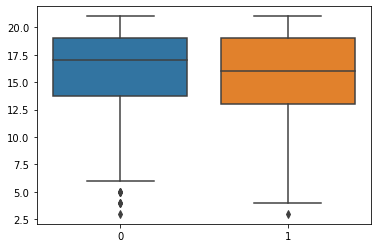

In [ ]:
sns.boxplot(data= [dados_masculinos.satisfacao ,dados_femininos.satisfacao])
print(dados_masculinos.satisfacao.describe())
print(dados_femininos.satisfacao.describe())

count    380.000000
mean      22.463158
std        3.693567
min        7.000000
25%       20.000000
50%       23.000000
75%       25.000000
max       28.000000
Name: Resolucao_Problemas, dtype: float64
count    72.000000
mean     20.763889
std       3.690464
min      12.000000
25%      18.000000
50%      21.000000
75%      24.000000
max      28.000000
Name: Resolucao_Problemas, dtype: float64
3.6868513797472247e-10
0.11451186239719391
0.0003812116991043839


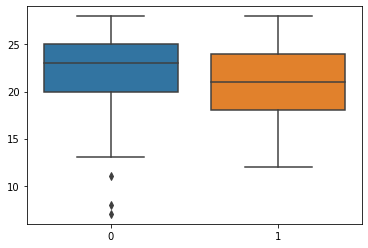

In [ ]:
dados.idade.describe()
sns.boxplot(data= [dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas])
print(dados_masculinos.Resolucao_Problemas.describe())
print(dados_femininos.Resolucao_Problemas.describe())
rho, p = shapiro(dados_masculinos.Resolucao_Problemas)

print (p)
rho, p = shapiro(dados_femininos.Resolucao_Problemas)
print (p)

rho, p = ttest_ind(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas)
print (p)



count    380.000000
mean      24.878947
std        2.729895
min       13.000000
25%       23.000000
50%       25.000000
75%       27.000000
max       28.000000
Name: Interpersoal, dtype: float64
count    72.000000
mean     24.194444
std       3.124816
min      16.000000
25%      22.000000
50%      25.000000
75%      27.000000
max      28.000000
Name: Interpersoal, dtype: float64


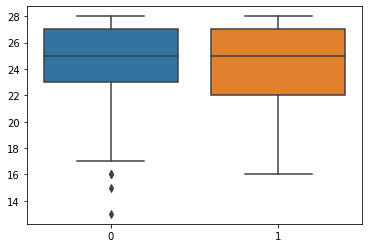

In [ ]:
sns.boxplot(data= [dados_masculinos.Interpersoal ,dados_femininos.Interpersoal])
print(dados_masculinos.Interpersoal.describe())
print(dados_femininos.Interpersoal.describe())

(array([4.000e+00, 5.100e+01, 3.710e+02, 1.565e+03, 2.901e+03, 3.014e+03,
        1.623e+03, 4.180e+02, 5.000e+01, 3.000e+00]),
 array([21.65789474, 21.81789474, 21.97789474, 22.13789474, 22.29789474,
        22.45789474, 22.61789474, 22.77789474, 22.93789474, 23.09789474,
        23.25789474]),
 <BarContainer object of 10 artists>)

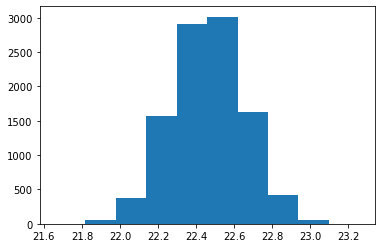

In [ ]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/danilo/Documentos/GitHub/zup-pesquisa-dados/danilo/zupedu/zupstatistic')
from zupstatistic import zupstats

teste = zupstats.bootstrap(dados_masculinos.Resolucao_Problemas)


z = plt.hist(teste)
z


(array([ 2.,  4.,  6.,  9.,  4., 15., 13.,  9.,  8.,  2.]),
 array([12. , 13.6, 15.2, 16.8, 18.4, 20. , 21.6, 23.2, 24.8, 26.4, 28. ]),
 <BarContainer object of 10 artists>)

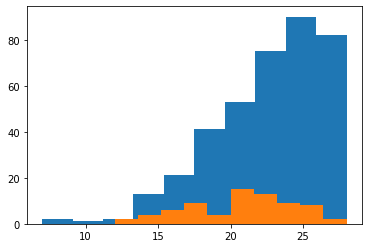

In [ ]:
x = plt.hist(dados_masculinos.Resolucao_Problemas)
x
plt.hist(dados_femininos.Resolucao_Problemas)

ValueError: cannot convert float NaN to integer

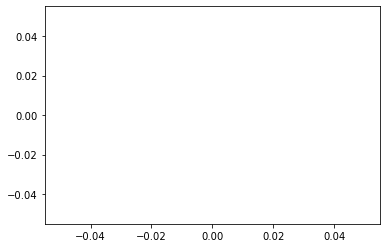

In [ ]:
sns.distplot(dados_masculinos.satisfacao)

In [ ]:
sns.distplot(dados_femininos.satisfacao)

In [ ]:
x = plt.hist(dados_masculinos.Resolucao_Problemas)

In [ ]:
import numpy as np

teste = np.random.choice(dados_masculinos.Resolucao_Problemas, size=100)

x = plt.hist(teste)

In [5]:
import pingouin as pg
pg.compute_effsize(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas, eftype='CLES', paired= False)

0.6366228070175438

In [ ]:
import sys
sys.path.append('/home/danilo/Documentos/GitHub/zup-pesquisa-dados/danilo')
import ZupEduStats.zupedustats as zup
zup.verifica_df_dependente(dados_masculinos.Resolucao_Problemas, dados_femininos.Resolucao_Problemas)


Teste na primeira váriavel:
Distribuição não normal 3.6868513797472247e-10
Teste na segunda váriavel:
Distribuição normal 0.11451186239719391
Aplicando Mannwthiteyu...
9942.0
0.00011155819820588666
Os grupos são diferentes


In [ ]:
pip install pingouin --user

Processing c:\users\danilo.ribeiro\appdata\local\pip\cache\wheels\ec\70\de\1e3c7a601836488b2cf43111bbf06c569e2a0b8d01b7d727a1\pingouin-0.4.0-py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached xarray-0.19.0-py3-none-any.whl (827 kB)
Processing c:\users\danilo.ribeiro\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a\littleutils-0.2.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import pingouin as pg

pg.mwu(dados_masculinos.Interpersoal ,dados_femininos.Interpersoal)
print (pg.mwu( dados_masculinos.satisfacao,dados_femininos.satisfacao))
print ('instabilidade_equipe ') 
print (pg.mwu( dados_masculinos.instabilidade_equipe,dados_femininos.instabilidade_equipe))
print ('instabilidade_tarefa') 
print (pg.mwu( dados_masculinos.instabilidade_tarefa ,dados_femininos.instabilidade_tarefa))
print ('instabilidade_tecnica')
print (pg.mwu( dados_masculinos.instabilidade_tecnica ,dados_femininos.instabilidade_tecnica))
print ('Gerenciamento_Stress')
print (pg.mwu( dados_masculinos.Gerenciamento_Stress ,dados_femininos.Gerenciamento_Stress))
print ('Resolucao_Problemas')
print (pg.mwu(  dados_masculinos.Resolucao_Problemas ,dados_femininos.Resolucao_Problemas))
print ('Gerenciamento_Emergencia')
print (pg.mwu( dados_masculinos.Gerenciamento_Emergencia ,dados_femininos.Gerenciamento_Emergencia))
print ('Aprendizado') 
print (pg.mwu( dados_masculinos.Aprendizado ,dados_femininos.Aprendizado))
print ('Interpersoal') 
print (pg.mwu( dados_masculinos.Interpersoal ,dados_femininos.Interpersoal))
print ('Burnout_cinismo') 
print (pg.mwu( dados_masculinos.Burnout_cinismo ,dados_femininos.Burnout_cinismo))
print ('Burnout_exaustao') 
print (pg.mwu( dados_masculinos.Burnout_exaustao ,dados_femininos.Burnout_exaustao))
print ('Burnout_eficacia') 
print (pg.mwu( dados_masculinos.Burnout_eficacia ,dados_femininos.Burnout_eficacia))



       U-val alternative     p-val       RBC      CLES
MWU  13287.5   two-sided  0.115266 -0.119607  0.559804
instabilidade_equipe 
       U-val alternative     p-val       RBC      CLES
MWU  10453.5   two-sided  0.053754  0.146479  0.426761
instabilidade_tarefa
       U-val alternative     p-val       RBC      CLES
MWU  10075.5   two-sided  0.021344  0.175018  0.412491
instabilidade_tecnica
      U-val alternative     p-val       RBC      CLES
MWU  9463.0   two-sided  0.002752  0.227353  0.386324
Gerenciamento_Stress
       U-val alternative     p-val       RBC      CLES
MWU  15486.5   two-sided  0.073707 -0.132054  0.566027
Resolucao_Problemas
       U-val alternative     p-val       RBC      CLES
MWU  17418.0   two-sided  0.000223 -0.273246  0.636623
Gerenciamento_Emergencia
       U-val alternative     p-val      RBC     CLES
MWU  14862.5   two-sided  0.242317 -0.08644  0.54322
Aprendizado
       U-val alternative     p-val       RBC      CLES
MWU  14602.5   two-sided  0.342337 -0.

Bootstrap Sample: 28    18.0
50    15.0
54    18.0
18    15.0
10     8.0
4     20.0
54    18.0
5     17.0
62    19.0
40     7.0
Name: satisfacao, dtype: float64


(array([2., 0., 0., 0., 0., 0., 2., 1., 3., 2.]),
 array([ 7. ,  8.3,  9.6, 10.9, 12.2, 13.5, 14.8, 16.1, 17.4, 18.7, 20. ]),
 <BarContainer object of 10 artists>)

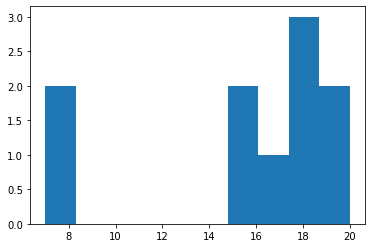

In [ ]:

from sklearn.utils import resample

data = dados_femininos.satisfacao
boot = resample(data, replace=True, n_samples=10)
print('Bootstrap Sample: %s' % boot)

plt.hist(boot)

In [ ]:
dados_femininos.satisfacao

0     21.0
1     19.0
2     13.0
3     21.0
4     20.0
      ... 
67    13.0
68     NaN
69    16.0
70    21.0
71    19.0
Name: satisfacao, Length: 72, dtype: float64

(array([ 3.,  0.,  3.,  6.,  3.,  6., 13.,  7., 17., 11.]),
 array([ 3. ,  4.8,  6.6,  8.4, 10.2, 12. , 13.8, 15.6, 17.4, 19.2, 21. ]),
 <BarContainer object of 10 artists>)

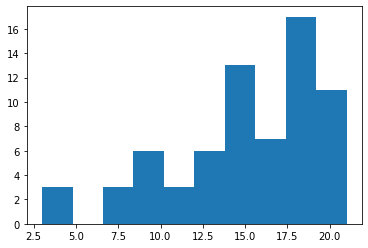

In [ ]:
plt.hist(dados_femininos.satisfacao)

In [37]:
teste = dados_femininos.satisfacao.dropna()

type(teste)
teste

0     21.0
1     19.0
2     13.0
3     21.0
4     20.0
      ... 
66    18.0
67    13.0
69    16.0
70    21.0
71    19.0
Name: satisfacao, Length: 69, dtype: float64

In [6]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.satisfacao.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

In [7]:
sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.satisfacao.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

(array([  8.,  14.,  55., 135., 224., 250., 170., 100.,  34.,  10.]),
 array([14.76 , 15.015, 15.27 , 15.525, 15.78 , 16.035, 16.29 , 16.545,
        16.8  , 17.055, 17.31 ]),
 <BarContainer object of 10 artists>)

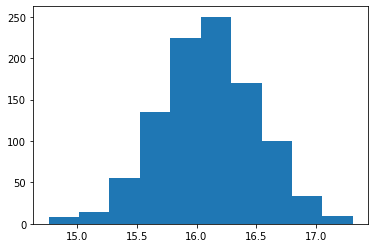

In [8]:
plt.hist(sample_mean_m)

In [6]:
import pingouin as pg
#pg.mwu(sample_mean_m,sample_mean_f)
pg.ttest(sample_mean_m,sample_mean_f)

NameError: name 'sample_mean_m' is not defined

(array([  5.,  10.,  36., 100., 191., 245., 216., 126.,  58.,  13.]),
 array([13.56 , 13.844, 14.128, 14.412, 14.696, 14.98 , 15.264, 15.548,
        15.832, 16.116, 16.4  ]),
 <BarContainer object of 10 artists>)

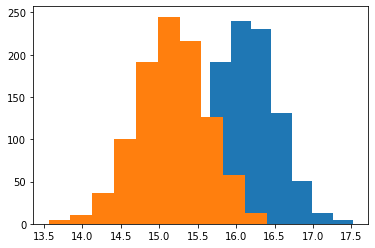

In [52]:
plt.hist(sample_mean_m)
plt.hist(sample_mean_f)

In [4]:

from bootstrap import Bootstrap


teste = Bootstrap()
teste.soma()


3

                T   dof alternative  p-val         CI95%   cohen-d BF10  power
T-test  56.199011  1998   two-sided    0.0  [0.66, 0.71]  2.513296  inf    1.0


C:\Users\danilo.ribeiro\AppData\Roaming\Python\Python38\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([ 13.,  37.,  83., 163., 218., 222., 150.,  85.,  22.,   7.]),
 array([23.15277778, 23.36388889, 23.575     , 23.78611111, 23.99722222,
        24.20833333, 24.41944444, 24.63055556, 24.84166667, 25.05277778,
        25.26388889]),
 <BarContainer object of 10 artists>)

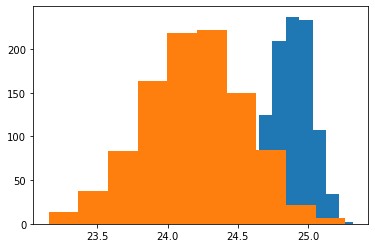

In [18]:


interpessoalMasculinoBS =  teste.doBoot(dados_masculinos.Interpersoal, len(dados_masculinos.Interpersoal))

interpessoalFemininoBS = teste.doBoot(dados_femininos.Interpersoal, len(dados_femininos.Interpersoal))

print(pg.ttest(interpessoalMasculinoBS,interpessoalFemininoBS))



plt.hist(interpessoalMasculinoBS)
plt.hist(interpessoalFemininoBS)





<AxesSubplot:>

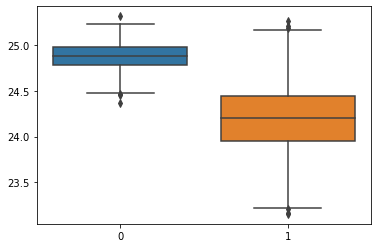

In [19]:
sns.boxplot(data= [interpessoalMasculinoBS ,interpessoalFemininoBS])

                T   dof alternative          p-val         CI95%   cohen-d  \
T-test  43.384223  1998   two-sided  2.748574e-290  [0.77, 0.84]  1.940201   

              BF10  power  
T-test  7.694e+285    1.0  


(array([ 10.,  25.,  78., 177., 249., 272., 130.,  47.,   8.,   4.]),
 array([27.43055556, 27.80277778, 28.175     , 28.54722222, 28.91944444,
        29.29166667, 29.66388889, 30.03611111, 30.40833333, 30.78055556,
        31.15277778]),
 <BarContainer object of 10 artists>)

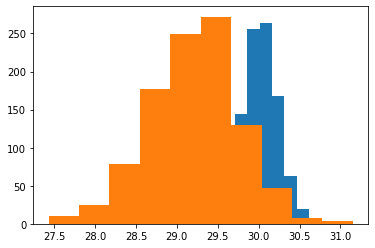

In [11]:
MasculinoBS =  teste.doBoot(dados_masculinos.Burnout_eficacia.dropna(), len(dados_masculinos.Burnout_eficacia))

FemininoBS = teste.doBoot(dados_femininos.Burnout_eficacia.dropna(), len(dados_femininos.Burnout_eficacia))

print(pg.ttest(MasculinoBS,FemininoBS))



plt.hist(MasculinoBS)
plt.hist(FemininoBS)

<AxesSubplot:>

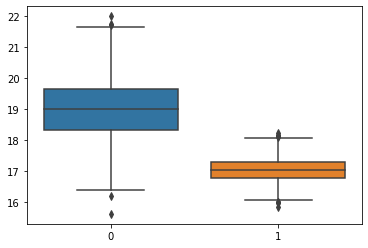

In [20]:
sns.boxplot(data= [MasculinoBS ,FemininoBS])

                T   dof alternative  p-val         CI95%   cohen-d BF10  power
T-test  57.266763  1998   two-sided    0.0  [1.88, 2.01]  2.561047  inf    1.0


C:\Users\danilo.ribeiro\AppData\Roaming\Python\Python38\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([  6.,  31.,  70., 149., 227., 240., 155.,  86.,  29.,   7.]),
 array([15.85      , 16.08789474, 16.32578947, 16.56368421, 16.80157895,
        17.03947368, 17.27736842, 17.51526316, 17.75315789, 17.99105263,
        18.22894737]),
 <BarContainer object of 10 artists>)

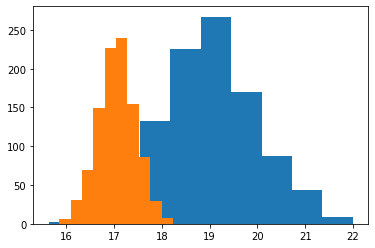

In [16]:

FemininoBS  =  teste.doBoot(dados_masculinos.Burnout_exaustao.dropna(), len(dados_masculinos.Burnout_exaustao))
MasculinoBS = teste.doBoot(dados_femininos.Burnout_exaustao.dropna(), len(dados_femininos.Burnout_exaustao))

print(pg.ttest(MasculinoBS,FemininoBS))



plt.hist(MasculinoBS)
plt.hist(FemininoBS)

<AxesSubplot:>

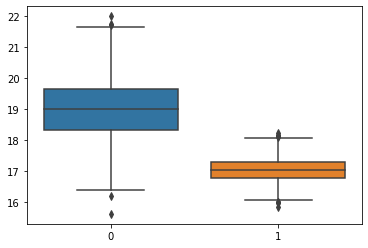

In [22]:
sns.boxplot(data= [MasculinoBS ,FemininoBS])

In [1]:
pip install -U scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


                T   dof alternative  p-val          CI95%   cohen-d BF10  \
T-test -52.111401  1998   two-sided    0.0  [-0.7, -0.65]  2.330493  inf   

        power  
T-test    1.0  


C:\Users\danilo.ribeiro\AppData\Roaming\Python\Python38\site-packages\pingouin\bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


(array([  4.,  23.,  67., 155., 266., 272., 155.,  48.,   9.,   1.]),
 array([23.92 , 24.116, 24.312, 24.508, 24.704, 24.9  , 25.096, 25.292,
        25.488, 25.684, 25.88 ]),
 <BarContainer object of 10 artists>)

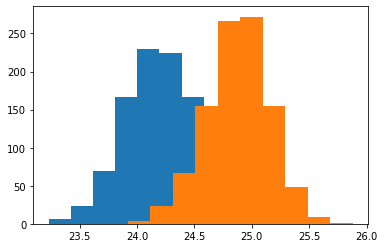

In [76]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.Interpersoal.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.Interpersoal.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

print(pg.ttest(sample_mean_m,sample_mean_f))

plt.hist(sample_mean_m)
plt.hist(sample_mean_f)


               T   dof alternative          p-val          CI95%   cohen-d  \
T-test -23.54105  1998   two-sided  2.359177e-108  [-0.4, -0.34]  1.052788   

             BF10  power  
T-test  2.88e+104    1.0  


(array([  2.,  12.,  36., 121., 235., 254., 220.,  85.,  31.,   4.]),
 array([21.89 , 22.146, 22.402, 22.658, 22.914, 23.17 , 23.426, 23.682,
        23.938, 24.194, 24.45 ]),
 <BarContainer object of 10 artists>)

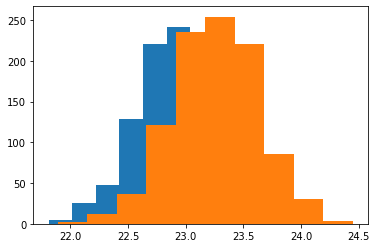

In [77]:
import numpy as np
sample_mean_f = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_masculinos.Aprendizado.dropna(), size=100)
    sample_mean_f.append(sample_n.mean())

sample_mean_m = []
for _ in range(1000):  #so B=10000
    sample_n = np.random.choice(dados_femininos.Aprendizado.dropna(), size=100)
    sample_mean_m.append(sample_n.mean())

print(pg.ttest(sample_mean_m,sample_mean_f))

plt.hist(sample_mean_m)
plt.hist(sample_mean_f)
